In [2]:
import pandas as pd

# Read the data
df_letters = pd.read_csv('../data/sentiment_scored_letters.csv')
df_sentiments = pd.read_csv('../data/sentiment_scored_sentences.csv')

Text(0.5, 1.0, 'Sentida score ')

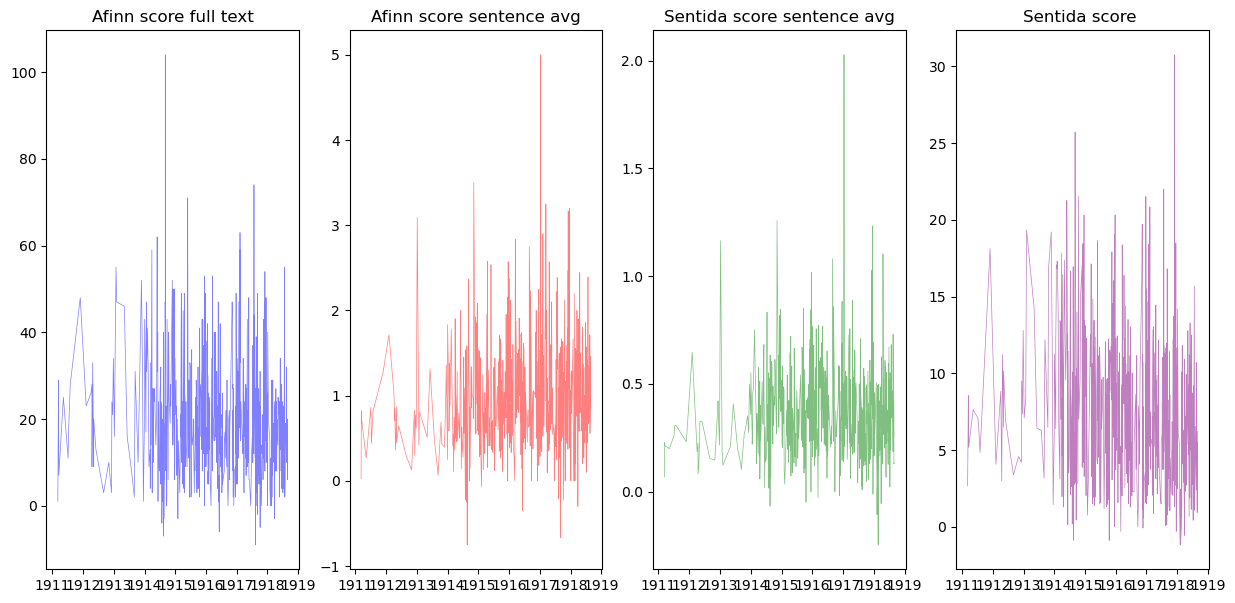

In [3]:
# plot sentiment score over time for date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# convert date to datetime
df_letters['date'] = pd.to_datetime(df_letters['date'])

fig, ax = plt.subplots(1,4,figsize=(15,7))
ax[0].plot(df_letters.date, df_letters.sentiment_score, color='blue', alpha=0.5, linewidth=0.5)
# title on ax 1
ax[0].set_title('Afinn score full text')
ax[1].plot(df_letters.date, df_letters.affin_score_sentenceavg, color='red', alpha=0.5, linewidth=0.5)
ax[1].set_title('Afinn score sentence avg')
ax[2].plot(df_letters.date, df_letters.sentida_score_sentenceavg, color='green', alpha=0.5, linewidth=0.5)
ax[2].set_title('Sentida score sentence avg')
ax[3].plot(df_letters.date, df_letters.sentida_score, color='purple', alpha=0.5, linewidth=0.5)
ax[3].set_title('Sentida score ')

In [8]:
# rename sentiment_score to afinn_score
df_letters = df_letters.rename(columns={'sentiment_score':'afinn_score'})


In [20]:

# Min-Max scaling function
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply the scaling to each column
df_letters['afinn_score_sentenceavg_scaled'] = min_max_scaling(df_letters['affin_score_sentenceavg'])
df_letters['sentida_score_sentenceavg_scaled'] = min_max_scaling(df_letters['sentida_score_sentenceavg'])
df_letters['sentida_score_scaled'] = min_max_scaling(df_letters['sentida_score'])
df_letters['afinn_score_scaled'] = min_max_scaling(df_letters['afinn_score'])

# average the scaled scores
df_letters['avg_scaled_score'] = df_letters[['afinn_score_sentenceavg_scaled','sentida_score_sentenceavg_scaled','sentida_score_scaled','afinn_score_scaled']].mean(axis=1)


<Axes: >

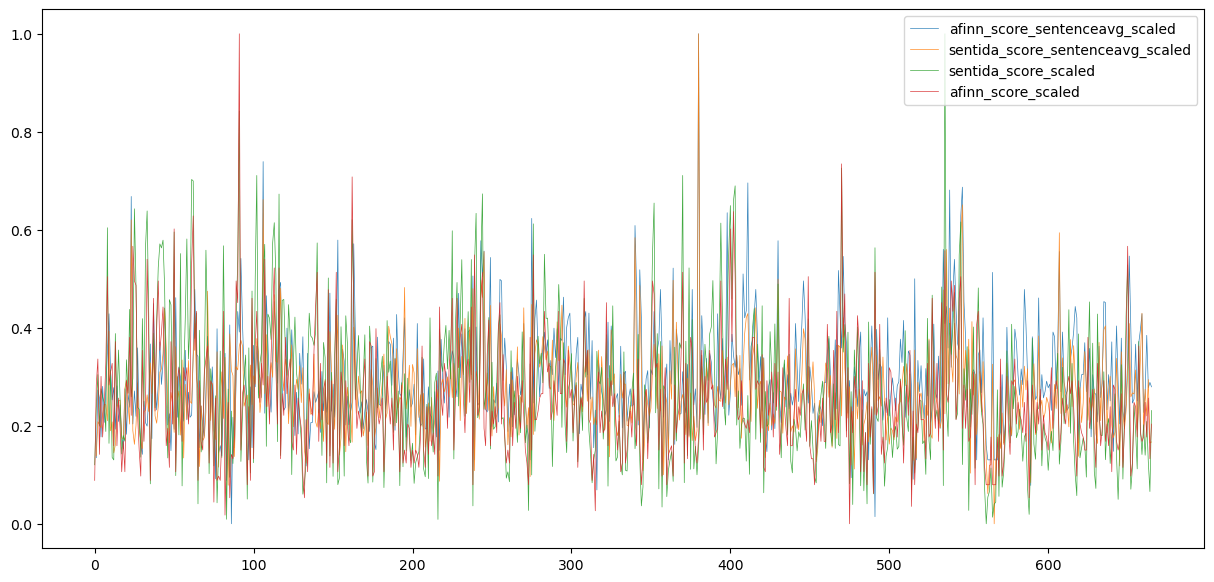

In [30]:
fig, ax = plt.subplots(1,figsize=(15,7))
#df_letters['avg_scaled_score'].plot(color='black',alpha=0.3, linewidth=5,ax=ax)
df_letters[
    [
        "afinn_score_sentenceavg_scaled",
        "sentida_score_sentenceavg_scaled",
        "sentida_score_scaled",
        "afinn_score_scaled",
    ]
].plot(alpha=0.9, linewidth=0.5,ax=ax)




<Axes: xlabel='date', ylabel='avg_scaled_score'>

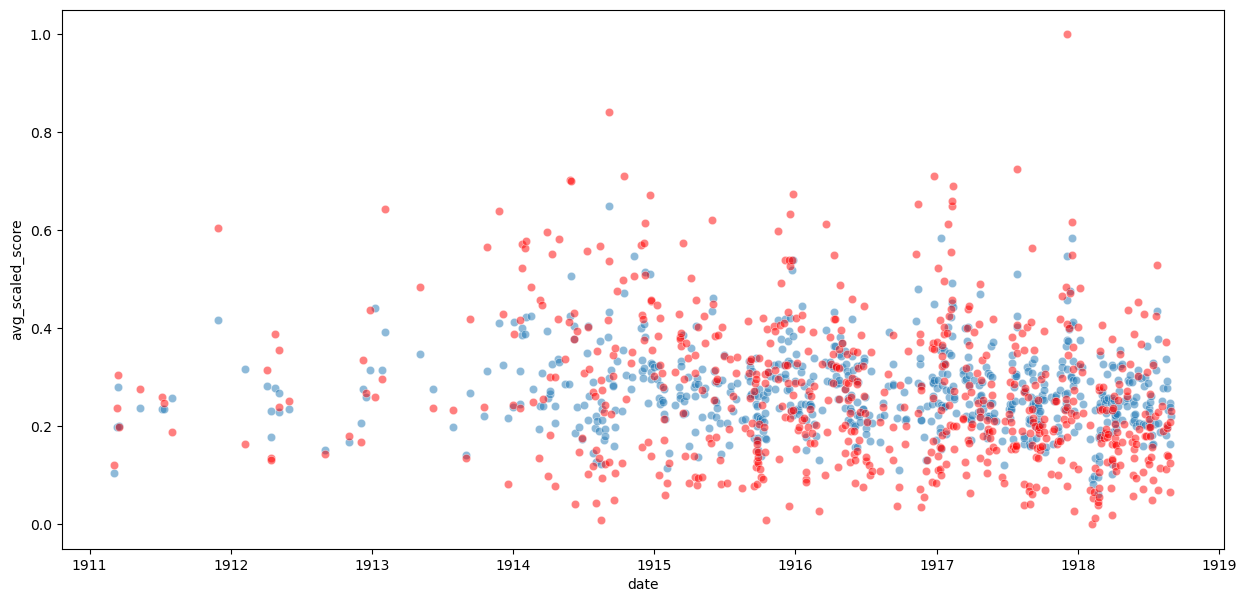

In [69]:
import seaborn as sns

# plot avg sentiment score per month
fig, ax = plt.subplots(1,figsize=(15,7))
sns.scatterplot(x="date", y="avg_scaled_score", data=df_letters,ax=ax, markers=True, alpha=0.5)
sns.scatterplot(x="date", y="sentida_score_scaled", 
    color='red',
 data=df_letters,ax=ax, markers=True, alpha=0.5)


# put in vertical lines for christmas eve every year
# for i in range(1911,1919):
#     ax.axvline(pd.to_datetime(str(i)+'-12-24'), color='red', linestyle='--', alpha=0.5)
    




In [53]:
# find the worst letters for each sentiment score
afinnsent=df_letters.sort_values(by='affin_score_sentenceavg',ascending=True).head(1)
sentidasent = df_letters.sort_values(by='sentida_score_sentenceavg',ascending=True).head(1)
sentida = df_letters.sort_values(by='sentida_score',ascending=True).head(1)
afinn = df_letters.sort_values(by='afinn_score',ascending=True).head(1)
avgscore = df_letters.sort_values(by='avg_scaled_score',ascending=True).head(1)

# concat the worst letters
worst_letters = pd.concat([afinnsent,sentidasent,sentida,afinn,avgscore])
# drop duplicates
worst_letters = worst_letters.drop_duplicates(subset=['id'])

# print the text of worst letters, wrapped
# and wrap the text

import textwrap
wrapper = textwrap.TextWrapper(width=80)

# print the worst letters

for index, row in worst_letters.iterrows():
    # date
    print(row['date'])
    print('Worst letter for',row['id'])
    print('Afinn score:',row['affin_score_sentenceavg'])
    print('Sentida score:',row['sentida_score_sentenceavg'])
    print('Sentida score:',row['sentida_score'])
    print('Afinn score:',row['afinn_score'])
    print('Avg score:',row['avg_scaled_score'])
    print(wrapper.fill(row['text']))
    print('\n')



1914-08-23 00:00:00
Worst letter for 87
Afinn score: -0.75
Sentida score: 0.465186294444444
Sentida score: 6.175856288888891
Afinn score: 7.0
Avg score: 0.17114435785560006
Kære Forældre!  Vi ligger nu tæt ved Allenstein og er nu hele Regimentet samlet
for at forhindre Russen i at komme over Grænsen, som han prøver hårdt på i disse
dage. Og i dag særlig i sydlig retning er der stærk Kanontorden og bulder. Vi
har ingen set endnu; men er tæt ved dem. Enkelte Patruljer af vor komp. har set
dem, men jeg har endnu altid haft held, og kommer aldrig i fronten. Det værste
er at vi har næsten ikke noget at spise da vejene er så dårlige, at de ikke kan
komme frem med Provianten. Jeg kan jo sagtens, da jeg kommer lidt på egen hånd,
og så kan man få nok endnu, skønt folk har heller ikke meget mere. Men det havde
jeg aldrig tænkt at jeg skulde komme til at gå ind til en privat mand og bede om
et stykke tørt brød. Vi ligger bagved en sø, hvor der ikke er meget fare for, at
de kan komme til os.  Ja n